<img src="../images/house.jpeg" style="float: center; margin: 20px; height: 55px">

##  Ames Housing Data and Kaggle Challenge

_Author: Afolabi Cardoso_

---

## Linear Regression Model (numerical and categorical features)

---
#### Contents
[Overview](#Overview) | [Imports](#Imports) | [Feature Selection](#Feature-Selection) | [Model Creation](#Model-Creation) | [Model Fit](#Model-Fit) | [Model Evaluation](#Model-Evaluation) | [Conclusion](#Conclusion) | [Kaggle Submission](#Kaggle-Submission)

---
## Overview

In this model we are going to improve upon the previous model. 

We will achieve this by using both numerical and categorical variables in creating the model. The addiction of more features helps increase the complexity, which in turn improves the bias seen from the previous model

Using the pandas get_dummies method, we will dummify all categorical features in both the train and kaggle test dataset.

---
## Imports

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [87]:
df = pd.read_csv('../datasets/train_clean.csv',index_col=[0])

In [88]:
df_test = pd.read_csv('../datasets/test_clean.csv',index_col=[0])

---
## Feature Selection

Before I dummify the categorical variables, I am going to concat the train and test dataset. This is done to ensure that both datasets have equal number of columns after dummification

In [89]:
objects_to_drop = ['House Style','Condition 1',
'Roof Matl','Exterior 2nd']
df.drop(columns=objects_to_drop, inplace=True)
df_test.drop(columns=objects_to_drop, inplace=True)

In [90]:
df_concat = pd.concat((df, df_test))

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


Using get_dummies method I dummify the concated dataset

In [91]:
df_concat_dummies = pd.get_dummies(df_concat, drop_first=True)

Split concatenated datasets into seperate train and test datasets

In [92]:
df_train = df[['Id']].merge(df_concat_dummies, how='left')
df_test = df_test[['Id']].merge(df_concat_dummies, how='left').drop(columns=['SalePrice'])

During the dummification, SalePrice was converted into floats. Using lambda function I'll convert it back to integer

In [93]:
df_train['SalePrice'] = df_train['SalePrice'].map(lambda x: int(x))

#### Drop columns with low correlation first

In [94]:
low_corr = ['Screen Porch','Bedroom AbvGr','3Ssn Porch','Mo Sold','BsmtFin SF 2',
       'Pool Area','Misc Val','Yr Sold','Low Qual Fin SF','Bsmt Half Bath','MS SubClass','Overall Cond','Kitchen AbvGr','Enclosed Porch']

In [95]:
objects_to_drop = ['House Style','Condition 1',
'Roof Matl','Exterior 2nd']

integers_to_drop = ['2nd Flr SF','Gr Liv Area','Garage Yr Blt','Year Remod/Add']

In [96]:
df_train.drop(columns=low_corr+integers_to_drop, inplace=True)
df_test.drop(columns=low_corr+integers_to_drop, inplace=True)

---
## Model Creation

Create model parameters

In [97]:
features = list(df_train.columns) 

In [98]:
X = df_train[features].drop(columns=['SalePrice'])
y = df_train['SalePrice']

#### Train/test/split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### Instantiate our model

In [100]:
model = LinearRegression()

## Model Fit

#### Fit the model

In [101]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Evaluation

#### Baseline

In [102]:
y.mean()

181469.70160897123

#### Train set evaluation

In [103]:
model.score(X_train, y_train)

0.896093685308771

#### Test set evaluation

In [104]:
model.score(X_test, y_test)

0.8861691344088435

#### Root Mean square error

Find the residuals 

In [105]:
y_predicted =  model.predict(X_test)
residuals = y_test - y_predicted
y.shape

(2051,)

Use residuals to calculate the Mean Squared Error

In [106]:
mse = metrics.mean_squared_error(y_test,y_predicted)
rmse = mse**0.5

#### Cross evaluation

In [107]:
cross_val_score(model, X_train, y_train).mean()

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7911328285144151

#### Histogram plot of the residuals

What we are looking for in the histogram is a <b> normal distribution </b>. This will show equal spread of variance the residuals.

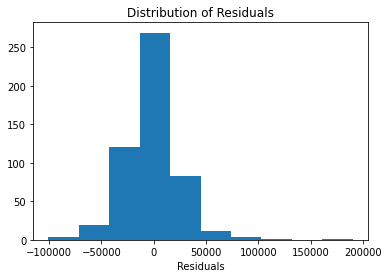

In [108]:
plt.hist(residuals)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals');

#### Scatter plot of residuals 

This scatter plot shows a much better spread than that of all numerical features

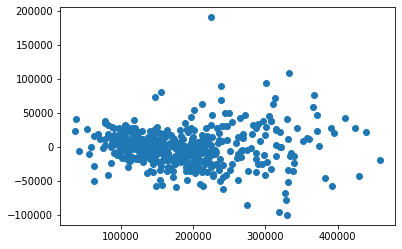

In [115]:
#plt.axhline(y.mean(), color = 'r')
plt.scatter(model.predict(X_test), residuals);

---
## Conclusion

The $R^2$ score for this model is<b> 79% </b> This indicates an improvement from the previous model. The addiction of more features helped reduce the bias.

In the next notebook, I will use a linear regression technique called Lasso regresssion

---
## Kaggle Submission

In [110]:
df_test=df_test[X.columns]

In [111]:
y_predict = model.predict(df_test) 

#### Create a dataframe of the ID and predicted sale price

In [112]:
df_test['SalePrice'] = y_predict
model_submission = df_test[['Id','SalePrice' ]]
model_submission

,Id,SalePrice
0,2658,77544.240747
1,2718,150569.715255
2,2414,221515.727394
3,1989,107004.327013
4,625,180851.934595
...,...,...
873,1662,191492.669014
874,1234,210060.677825
875,1373,130747.262058
876,1672,98561.088911


---
## Export

#### Export model_submission dataframe

In [113]:
model_submission.set_index('Id', inplace=True)

In [114]:
model_submission.to_csv('../datasets/dummified_linear_regression_model.csv')